In [2]:
import  pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("C:/Users/Savita Seharawat/Desktop/data sets/titanic.csv")
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum().sum()

866

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
df = df.drop(["PassengerId","Name","Ticket","Cabin"],axis = 1)

In [11]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [12]:
df["Sex"] = df["Sex"].astype("category")
df["Survived"] = df["Survived"].astype("category")
df["Embarked"] = df["Embarked"].astype("category")
df["Pclass"] = df["Pclass"].astype("category")

In [13]:
df.dtypes

Survived    category
Pclass      category
Sex         category
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked    category
dtype: object

In [14]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [15]:
Age_median = df["Age"].median()

In [16]:
df["Age"] = df["Age"].fillna(value = Age_median)

In [17]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [18]:
df = df.dropna()

In [19]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [31]:
dfx = df.drop("Survived", axis =1 )

In [32]:
dfy = df["Survived"]

In [33]:
dfx.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [34]:
dfx["Pclass"].unique()

[3, 1, 2]
Categories (3, int64): [1, 2, 3]

In [35]:
dfx = pd.get_dummies(dfx)

In [37]:
dfx.head(5)

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [40]:
dfx.describe().T.round(0)

,count,mean,std,min,25%,50%,75%,max
Age,889.0,29.0,13.0,0.0,22.0,28.0,35.0,80.0
SibSp,889.0,1.0,1.0,0.0,0.0,0.0,1.0,8.0
Parch,889.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0
Fare,889.0,32.0,50.0,0.0,8.0,14.0,31.0,512.0
Pclass_1,889.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Pclass_2,889.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Pclass_3,889.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
Sex_female,889.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
Sex_male,889.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
Embarked_C,889.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
scaler = MinMaxScaler()

In [43]:
scaler_dfx = pd.DataFrame(scaler.fit_transform(dfx),columns = dfx.columns)

In [44]:
scaler_dfx.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,889.0,0.363096,0.163168,0.0,0.271174,0.346569,0.434531,1.0
SibSp,889.0,0.065523,0.137963,0.0,0.000000,0.000000,0.125000,1.0
Parch,889.0,0.063742,0.134460,0.0,0.000000,0.000000,0.000000,1.0
Fare,889.0,0.062649,0.097003,0.0,0.015412,0.028213,0.060508,1.0
Pclass_1,889.0,0.240720,0.427761,0.0,0.000000,0.000000,0.000000,1.0
Pclass_2,889.0,0.206974,0.405365,0.0,0.000000,0.000000,0.000000,1.0
Pclass_3,889.0,0.552306,0.497536,0.0,0.000000,1.000000,1.000000,1.0
Sex_female,889.0,0.350956,0.477538,0.0,0.000000,0.000000,1.000000,1.0
Sex_male,889.0,0.649044,0.477538,0.0,0.000000,1.000000,1.000000,1.0
Embarked_C,889.0,0.188976,0.391710,0.0,0.000000,0.000000,0.000000,1.0


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
input_train,input_test,output_train,output_test = train_test_split(scaler_dfx,dfy,test_size = 0.2, random_state = 4)

# KNN  algorithm

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
KNN = KNeighborsClassifier()
KNN

KNeighborsClassifier()

In [49]:
Knn = KNN.fit(input_train,output_train)
Knn

KNeighborsClassifier()

In [50]:
pred_test = Knn.predict(input_test)
pred_test

C:\Users\Savita Seharawat\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0], dtype=int64)

In [51]:
output_test

858    1
291    1
263    0
322    1
820    1
      ..
425    0
445    1
279    1
864    0
42     0
Name: Survived, Length: 178, dtype: category
Categories (2, int64): [0, 1]

In [36]:
output_test.shape

(267,)

In [53]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [54]:
accuracy_score_knn = round(accuracy_score(output_test,pred_test)*100,0)
accuracy_score_knn

77.0

In [55]:
cf_matrix_knn = confusion_matrix(output_test,pred_test)
cf_matrix_knn

array([[89, 16],
       [25, 48]], dtype=int64)

In [56]:
import seaborn as sb
import numpy as np

In [41]:
output_test.shape

(267,)

In [61]:
141 + 23 + 35 + 68

267

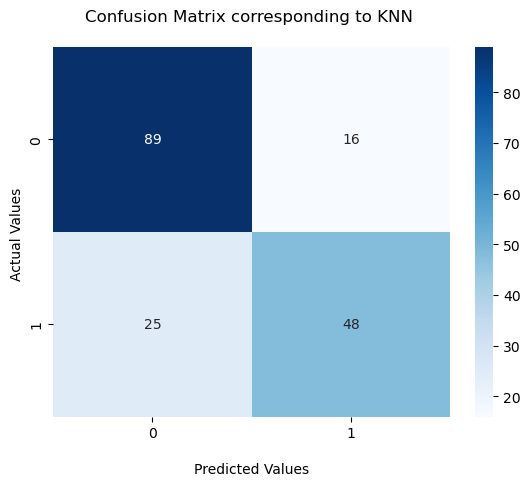

In [57]:
ax = sb.heatmap(cf_matrix_knn,annot=True, fmt = "d" ,cmap='Blues')
ax.set_title('Confusion Matrix corresponding to KNN \n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])
plt.show()

In [59]:
16 /(89+16+25+48)

0.0898876404494382

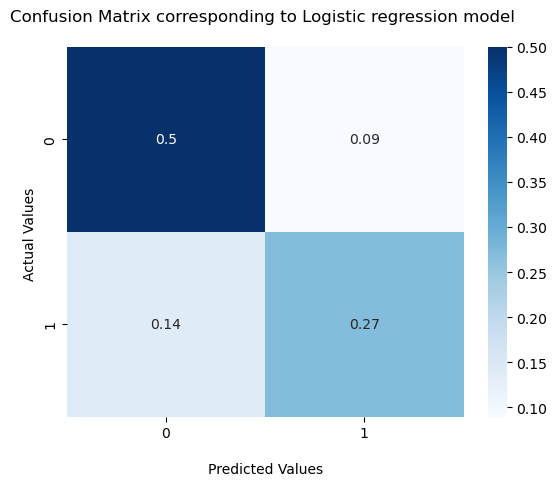

In [60]:
ax = sb.heatmap(cf_matrix_knn/np.sum(cf_matrix_knn),annot=True,  cmap='Blues')
ax.set_title('Confusion Matrix corresponding to Logistic regression model \n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])
plt.show()

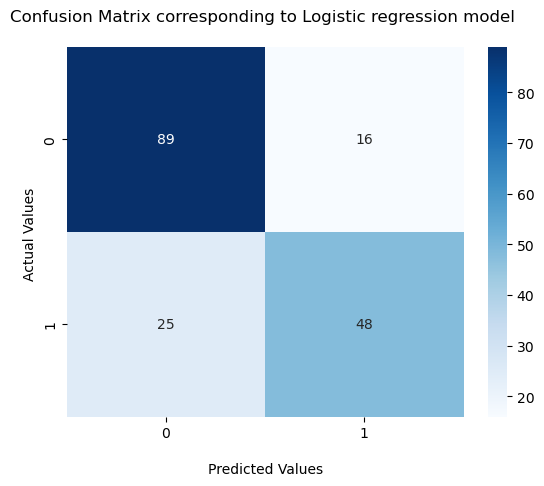

In [61]:
ax = sb.heatmap(cf_matrix_knn,annot=True,fmt = "d" , cmap='Blues')
ax.set_title('Confusion Matrix corresponding to Logistic regression model \n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])
plt.show()

In [64]:
89+25

114

In [67]:
# How many retrieved items are relevant?
# Answer : precision

precision_0 = 89/(89+25)
print("precision_0   :",precision_0)
precision_1 = 48/(48+16)
print("precision_1  :" , precision_1)
# How many relevant items are retrieved?
# Answer : Recall
recall_0 = 89/(89+16)
print("recall_0  :" ,recall_0)
recall_1 = 48/(48 + 25)
print("recall_1  :", recall_1)

precision_0   : 0.7807017543859649
precision_1  : 0.75
recall_0  : 0.8476190476190476
recall_1  : 0.6575342465753424


In [65]:
classification_report1 = classification_report(output_test,pred_test)
print(classification_report1)

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       105
           1       0.75      0.66      0.70        73

    accuracy                           0.77       178
   macro avg       0.77      0.75      0.76       178
weighted avg       0.77      0.77      0.77       178



# Higher precision means that an algorithm returns more relevant results than irrelevant ones

# high recall means that an algorithm returns most of the relevant results (whether or not irrelevant ones are also returned)

## Consider a computer program for recognizing dogs (the relevant element) in a digital photograph. Upon processing a picture which contains ten cats and twelve dogs, 
## the program identifies eight dogs. Of the eight elements identified as dogs, only five actually are dogs (true positives), while the other three are cats (false positives). 
## Seven dogs were missed (false negatives), and seven cats were correctly excluded (true negatives). 

In [ ]:
Precision_Dog  =  5/8
recall_dog    = 5/12

Precision_Dog  =  5/8
recall_dog    = 5/10

In [ ]:
# Accuracy: How often is the classifier correct?
# Misclassification Rate: Overall, how often is it wrong? It is also called “Error rate”
# True Positive Rate (TPR): When it’s actually yes, how often does it predict yes?. It is also known as “Sensitivity” or “Recall”
# False Positive Rate (FPR): When it’s actually no, how often does it predict yes?

## Type I error is the mistaken rejection of an actually true null hypothesis (also known as a "false positive" finding or conclusion; 
#### example: "an innocent person is convicted"), 
## while a Type II error is the failure to reject a null hypothesis that is actually false (also known as a "false negative" finding or conclusion; 
### example: "a guilty person is not convicted")

In [ ]:
type_1_errow_rate = 3

## TYPE I ERROR:
## https://miro.medium.com/v2/resize:fit:1400/format:webp/1*SjUmwp_TD4qHXYHB0Qtl-A.png

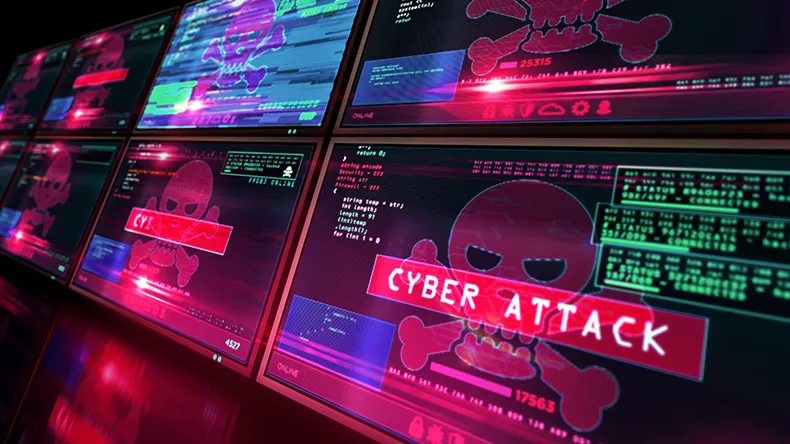

### This type of error can prove to be very dangerous. Our system predicted no attack but in real attack takes place, 
## in that case no notification would have reached the security team and nothing can be done to prevent it. 
### The False Positive cases above fall in this category and thus one of the aim of model is to minimize this value.

### TYPE II ERROR:
## https://miro.medium.com/v2/resize:fit:1400/format:webp/1*zGxclRp2mEjm-YgFwqgYjQ.jpeg

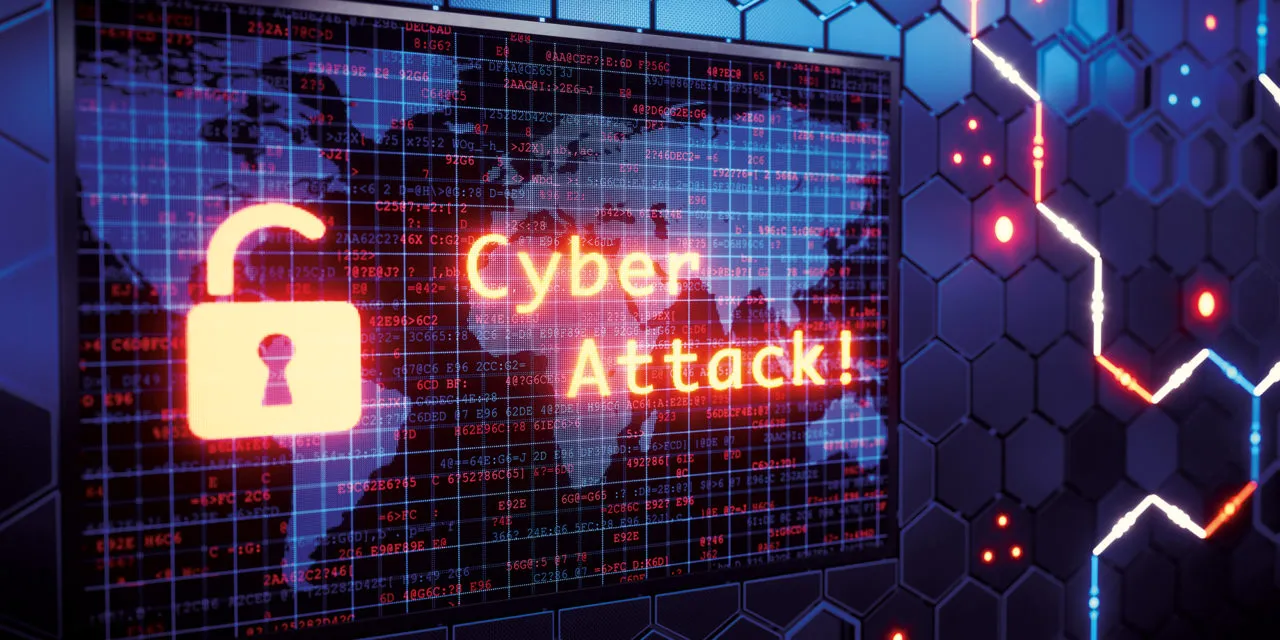

### More generally, recall is simply the complement of the type II error rate (i.e., one minus the type II error rate).
### Precision is related to the type I error rate, but in a slightly more complicated way, as it also depends upon the prior distribution of seeing a relevant vs. an irrelevant item.

## Consider a brain surgeon removing a cancerous tumor from a patient's brain. 
## The surgeon needs to remove all of the tumor cells since any remaining cancer cells will regenerate the tumor.
## Conversely, the surgeon must not remove healthy brain cells 
### since that would leave the patient with impaired brain function. 
##
## The surgeon may be more liberal in the area of the brain
## he removes to ensure he has extracted all the cancer cells.
## This decision increases recall but reduces precision. On the other hand,
## the surgeon may be more conservative in the brain cells he removes to ensure he extracts only cancer cells.
## This decision increases precision but reduces recall. 
## That is to say, greater recall increases the chances of removing healthy cells (negative outcome) 
## and increases the chances of removing all cancer cells (positive outcome).
## Greater precision decreases the chances of removing healthy cells (positive outcome) 
## but also decreases the chances of removing all cancer cells (negative outcome).